# Fashion MNIST in TensorFlow 

### Importing necessary modules 

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input , Flatten, Conv2D, MaxPooling2D, Dropout
print(tf.__version__)

2.1.0


### Loading Fashion Mnist Data 

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


### Visualizing Loaded Data

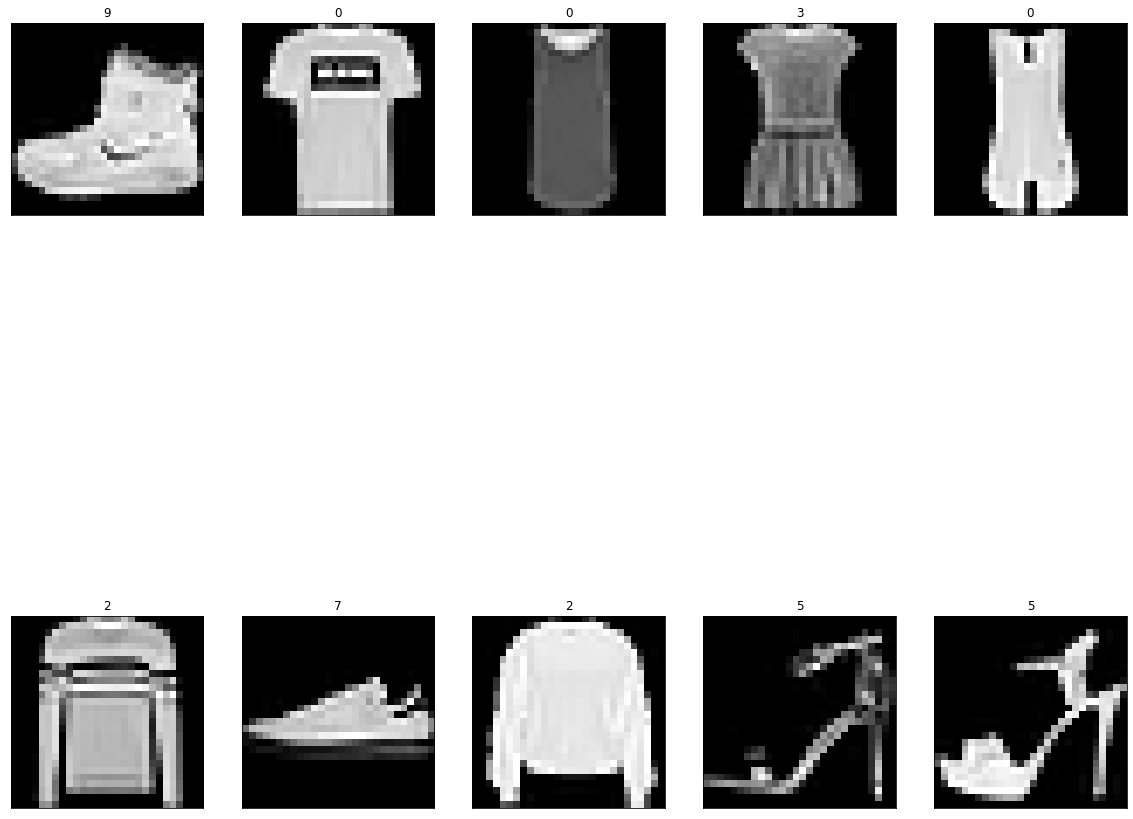

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig=plt.figure(figsize=(20,20))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))

In [13]:
 # Images as viewed by Computer
import numpy as np 
np.set_printoptions(linewidth=150)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

### Data Preprocessing 

In [6]:
# The INPUT data should have a color channel also for CNN's for convolution operation

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape: ", X_train.shape)


X_train shape:  (60000, 28, 28, 1)


In [7]:
# Rescaling data between (0-1)

X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
# Getting the number of classes

k = len(set(y_train))
print("The number of classes are: ", k)

The number of classes are:  10


In [9]:
X_train[0].shape

(28, 28, 1)

### Model Architecture

In [17]:
# Bulding the model by functional API

input_ = Input(shape=X_train[0].shape) #input layer of CNN
hidden = Conv2D(32, (3,3), strides=2, activation='relu')(input_)
# hidden = MaxPooling2D(2,2)(hidden)
hidden = Conv2D(64, (3,3), strides=2, activation='relu')(hidden)
# hidden = MaxPooling2D(2,2)(hidden)
hidden = Conv2D(128, (3,3), strides=2, activation='relu')(hidden)
hidden = Flatten()(hidden)
hidden = Dropout(0.2)(hidden)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dropout(0.2)(hidden)
hidden = Dense(k, activation='softmax')(hidden)


model = Model(input_, hidden) # Model(input_list, output_list) -- Here size of input_list = single input 
                         #  and output_list = single outpul

### Model Compile 

In [18]:
# Compile and Fit
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 331us/sample - loss: 0.5209 - accuracy: 0.8059 - val_loss: 0.3993 - val_accuracy: 0.8494
Epoch 2/10
60000/60000 [==============================] - 20s 330us/sample - loss: 0.3604 - accuracy: 0.8634 - val_loss: 0.3551 - val_accuracy: 0.8638
Epoch 3/10
60000/60000 [==============================] - 19s 324us/sample - loss: 0.3117 - accuracy: 0.8823 - val_loss: 0.3536 - val_accuracy: 0.8701
Epoch 4/10
60000/60000 [==============================] - 19s 318us/sample - loss: 0.2803 - accuracy: 0.8941 - val_loss: 0.2995 - val_accuracy: 0.8905
Epoch 5/10
60000/60000 [==============================] - 19s 319us/sample - loss: 0.2540 - accuracy: 0.9038 - val_loss: 0.3059 - val_accuracy: 0.8897
Epoch 6/10
60000/60000 [==============================] - 19s 318us/sample - loss: 0.2335 - accuracy: 0.9109 - val_loss: 0.2957 - val_accuracy: 0.8940
Epoch 7/10
60000/60000 [====================

### Loss per Iteration 

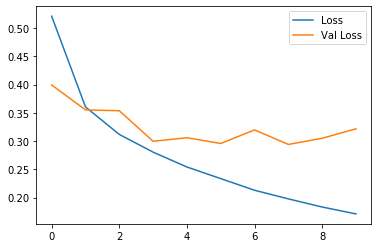

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.legend()

### Accuracy Per Iteration 

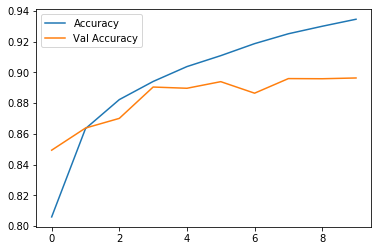

In [21]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label="Val Accuracy")
plt.legend()

###  Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


Confusion Matrix(Without Normalization)
[[914   0  20  15   3   1  37   0  10   0]
 [  4 971   2  16   1   0   4   0   2   0]
 [ 22   0 896  10  31   0  41   0   0   0]
 [ 13   1  17 926  20   0  22   0   1   0]
 [  2   0 113  38 743   0 101   0   3   0]
 [  0   0   0   1   0 987   0   5   1   6]
 [151   0  98  38  58   0 645   0  10   0]
 [  0   0   0   0   0  20   0 931   0  49]
 [  6   0   4   0   3   6   2   2 976   1]
 [  0   0   0   0   0   7   0  18   0 975]]


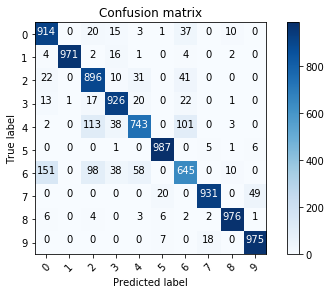

In [23]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float32')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix(Without Normalization)")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))